In [3]:
from Feeder import Feeder
from CNN import CNN
import os

In [4]:
feeder = Feeder()
gen = feeder.iterData
cnn = CNN()

In [5]:
cnn.build(32, 512, 512)
cnn.compile()

2023-12-07 12:42:47.248738: I metal_plugin/src/device/metal_device.cc:1154] Metal device set to: Apple M1
2023-12-07 12:42:47.248778: I metal_plugin/src/device/metal_device.cc:296] systemMemory: 8.00 GB
2023-12-07 12:42:47.248787: I metal_plugin/src/device/metal_device.cc:313] maxCacheSize: 2.67 GB
2023-12-07 12:42:47.249361: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:303] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2023-12-07 12:42:47.249742: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:269] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)


In [6]:
cnn.printSummary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_1 (InputLayer)        [(None, 32, 512, 512)]       0         []                            
                                                                                                  
 conv2d (Conv2D)             (None, 30, 510, 32)          147488    ['input_1[0][0]']             
                                                                                                  
 max_pooling2d (MaxPooling2  (None, 15, 255, 32)          0         ['conv2d[0][0]']              
 D)                                                                                               
                                                                                                  
 conv2d_1 (Conv2D)           (None, 13, 253, 64)          18496     ['max_pooling2d[0][0]']   

In [7]:
cnn.loadWeights("CNNWeights")

In [8]:
feeder = Feeder()
folder = "../3D_Volumes/test"
x_test, y_test = feeder.bagData(0, 100, folder)

  0%|          | 0/100 [00:00<?, ?it/s]

100%|██████████| 100/100 [00:22<00:00,  4.37it/s]


In [9]:
import pickle
def Pickle(fileName: str, object: any) -> None:
    with open(f"{fileName}.pkl", "wb") as file:
        pickle.dump(object, file)

def UnPickle(fileName: str) -> any:
    with open(f"{fileName}.pkl", 'rb') as file:
        object = pickle.load(file)
        return object

In [12]:
loss, acc = UnPickle("cnnTrainingData")

In [13]:
import pandas as pd
y_names: list = ["bowel", "extra", "liver", "kidney", "spleen"]

losses_bowel = [tensor.numpy().tolist() for tensor in loss["bowel"]]
accuracies_bowel = [tensor.numpy().tolist() for tensor in acc["bowel"]]
losses_extra = [tensor.numpy().tolist() for tensor in loss["extra"]]
accuracies_extra = [tensor.numpy().tolist() for tensor in acc["extra"]]
losses_liver = [tensor.numpy().tolist() for tensor in loss["liver"]]
accuracies_liver = [tensor.numpy().tolist() for tensor in acc["liver"]]
losses_kidney = [tensor.numpy().tolist() for tensor in loss["kidney"]]
accuracies_kidney = [tensor.numpy().tolist() for tensor in acc["kidney"]]
losses_spleen = [tensor.numpy().tolist() for tensor in loss["spleen"]]
accuracies_spleen = [tensor.numpy().tolist() for tensor in acc["spleen"]]

data = {"Epoch": list(range(0, len(losses_bowel))),
        "Loss_bowel": losses_bowel,
        "Loss_extra": losses_extra,
        "Loss_liver": losses_liver,
        "Loss_kidney": losses_kidney,
        "Loss_spleen": losses_spleen,
        "Acc_bowel": accuracies_bowel,
        "Acc_extra": accuracies_extra,
        "Acc_liver": accuracies_liver,
        "Acc_kidney": accuracies_kidney,
        "Acc_spleen": accuracies_spleen,
        }
df = pd.DataFrame(data)
df.head()

,Epoch,Loss_bowel,Loss_extra,Loss_liver,Loss_kidney,Loss_spleen,Acc_bowel,Acc_extra,Acc_liver,Acc_kidney,Acc_spleen
0,0,0.043827,0.078251,0.093198,3.499140,2.572948,1.000000,1.000000,1.0,0.000000,0.000000
1,1,0.014079,0.056726,0.017822,0.076085,0.067293,1.000000,1.000000,1.0,0.500000,0.500000
2,2,3.157589,2.782976,0.063548,2.370793,0.189262,0.666667,0.666667,1.0,0.333333,0.666667
3,3,0.000055,0.102645,0.001454,0.076890,0.103011,0.750000,0.750000,1.0,0.500000,0.750000
4,4,0.107538,0.073753,0.037879,0.168327,0.179942,0.800000,0.800000,1.0,0.600000,0.800000


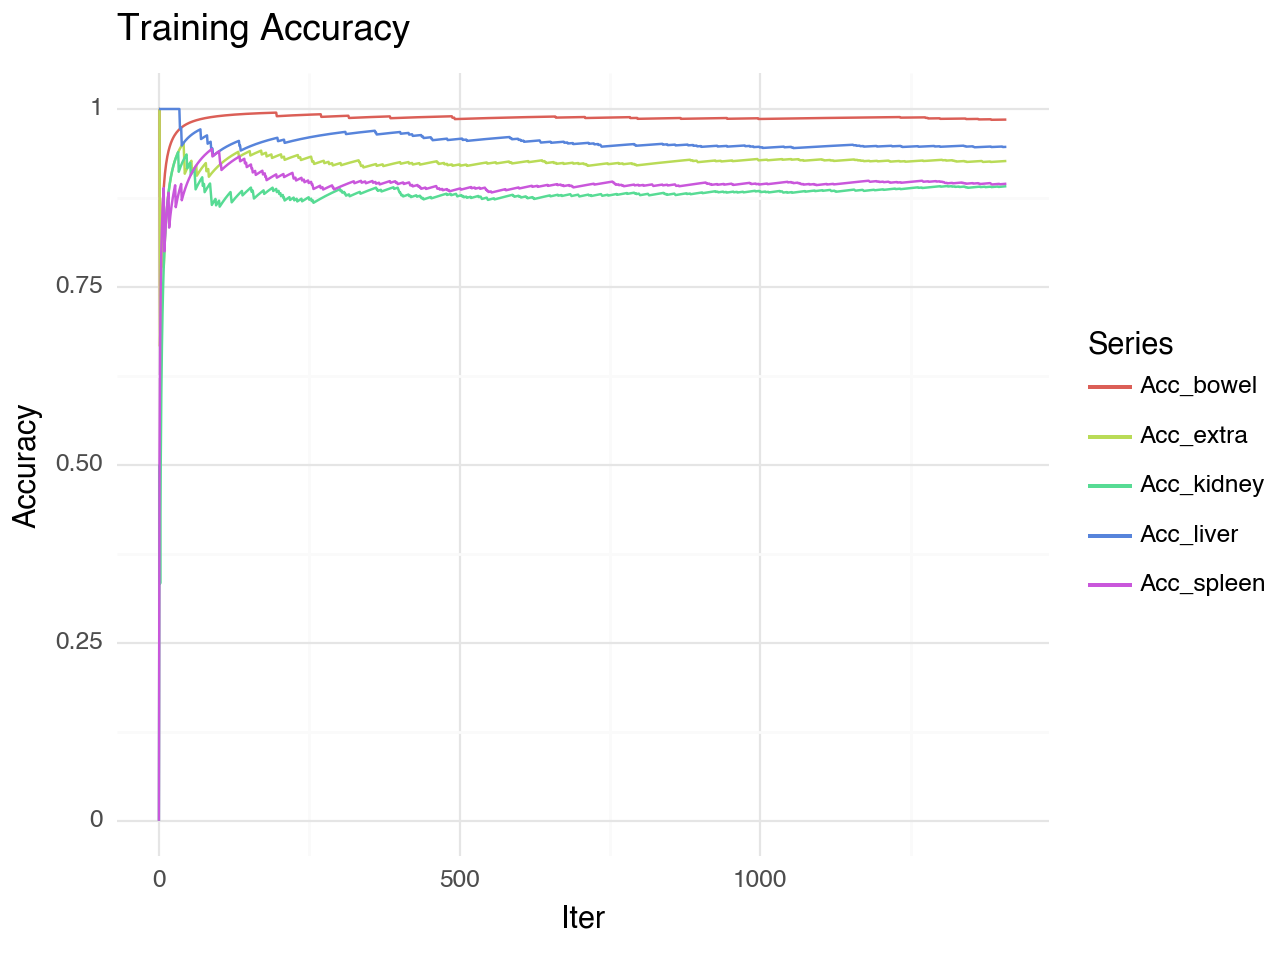

In [15]:
df_long = df[["Epoch", "Acc_bowel", "Acc_extra", "Acc_liver", "Acc_kidney", "Acc_spleen"]].melt(id_vars=['Epoch'], var_name='Series', value_name='Value')

from plotnine import ggplot, aes, geom_line, labs, theme_minimal, theme_dark, theme_classic, theme_linedraw, theme_void, theme_bw, theme_update, theme_538, theme_tufte, theme_get

# Plot
plot = (ggplot(df_long, aes(x='Epoch', y='Value', color='Series'))
        + geom_line()
        + labs(title='Training Accuracy', x='Iter', y='Accuracy')
        + theme_minimal())
print(plot)

In [34]:
cnn.predictT(x_test[0])

1/1 [==============================] - 0s 197ms/step


[array([[0.93941516, 0.06058485]], dtype=float32),
 array([[0.9225008 , 0.07749914]], dtype=float32),
 array([[0.91702807, 0.06875484, 0.0142171 ]], dtype=float32),
 array([[0.87195915, 0.09419572, 0.03384509]], dtype=float32),
 array([[0.8559798 , 0.07022735, 0.07379285]], dtype=float32)]